In [1]:
#Load the necessary Libraries
import pandas as pd                       # To load and work with loaded dataset 
import numpy as np                        # To perform numeric operations
import seaborn as sns                     # To work with graph libraries for plotting and charting 
import matplotlib.pyplot as plt           # To plot parameters in seaborn
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Step 1::
# Start of EDA 
# Loading loan data from CSV and finding total number of records
loandf = pd.read_csv('loan.csv')
loandf.shape[0]

39717

In [3]:
## Observation::: There are total 39717 loan records

In [4]:
# Step 2::
# Inspecting for records
print(loandf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
## Observation::: There are 111 columns in provided data set

In [6]:
# Step 3::
# Loan Status indcates the status o provided loan record in the data set
print("Status within record set =", loandf.loan_status.unique())

Status within record set = ['Fully Paid' 'Charged Off' 'Current']


In [7]:
## Observation:: There are three types of loan records w.r.t. status "Fully Paid", "Charged Off" and "Current".       

In [8]:
## Recommendation::  Based on data dictionary description and above values of status
##                   the records are to be retained and  filtered out

In [9]:
# Step 4::
# Retaining loan records that are having loan status 'Fully Paid' and 'Charged Off' as the problem in hand is 
# to find out possible defaulters hence the to be model should predict one of the two posible outcomes, 
# i.e., applicant's full paid and applicant's defaulted by deriving an equation considering the records of 
# these two record scenarios hence the records with status "Current" is assumed as not contribute to derived model equation
loandffltrd = loandf.loc[loandf['loan_status'] != 'Current']
print("Number of records in filtered data set = ", loandffltrd.shape[0])
print("Loan Status = ", loandffltrd.loan_status.unique())

Number of records in filtered data set =  38577
Loan Status =  ['Fully Paid' 'Charged Off']


In [10]:
## Observation:: The filered set is having total 38577 loan records carrying only 'Fully Paid' and 'Charged Off' record

In [11]:
# Step 5::
# Finding number of rows an columns in the record set
rows = loandffltrd.shape[0]
cols = loandffltrd.shape[1]
print("Rows =", rows, " and Columns =", cols)

Rows = 38577  and Columns = 111


In [12]:
# Step 6::
# Preliminary checking presence of NA values across different attributes in the record set to understand possible treatment of missing
# values in future (e.g., to ignore or to impute with manufactured values such as mean, median etc.)
loandffltrd.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [13]:
## Observation:: There are columns (attributes) within the filtered record set for which values are missing for all records

In [14]:
#Step 7::
#Preparing column list that contain null values more than equal to 80%
nullthres = 80.0 # Setting threshold as 80% for identfying columns/ attributes in the data set 
dropcollist = [] # Initialising drop column list
for col in loandffltrd.columns:     # Looping through columns to identify droppable candidates
    #print(loandf[col].isnull().sum())
    nullcnt = loandffltrd[col].isnull().sum() # Gathering missing value count info for each column of the record set
    nullpct = (nullcnt/rows)*100  # Calculating percentage of missing values for each attribute
    if nullpct >= nullthres: # Checking for missing value percent against threshold
        dropcollist.append(col) # Appending droppable columns in the list
        print(col, nullcnt, nullpct, sep=" : ")
    #printcol, nullpct)

mths_since_last_record : 35837 : 92.8973222386396
next_pymnt_d : 38577 : 100.0
mths_since_last_major_derog : 38577 : 100.0
annual_inc_joint : 38577 : 100.0
dti_joint : 38577 : 100.0
verification_status_joint : 38577 : 100.0
tot_coll_amt : 38577 : 100.0
tot_cur_bal : 38577 : 100.0
open_acc_6m : 38577 : 100.0
open_il_6m : 38577 : 100.0
open_il_12m : 38577 : 100.0
open_il_24m : 38577 : 100.0
mths_since_rcnt_il : 38577 : 100.0
total_bal_il : 38577 : 100.0
il_util : 38577 : 100.0
open_rv_12m : 38577 : 100.0
open_rv_24m : 38577 : 100.0
max_bal_bc : 38577 : 100.0
all_util : 38577 : 100.0
total_rev_hi_lim : 38577 : 100.0
inq_fi : 38577 : 100.0
total_cu_tl : 38577 : 100.0
inq_last_12m : 38577 : 100.0
acc_open_past_24mths : 38577 : 100.0
avg_cur_bal : 38577 : 100.0
bc_open_to_buy : 38577 : 100.0
bc_util : 38577 : 100.0
mo_sin_old_il_acct : 38577 : 100.0
mo_sin_old_rev_tl_op : 38577 : 100.0
mo_sin_rcnt_rev_tl_op : 38577 : 100.0
mo_sin_rcnt_tl : 38577 : 100.0
mort_acc : 38577 : 100.0
mths_since_re

In [15]:
##Observation::: There are around 56 columns out of 111 columns for which missing values more than equal to 80% 

In [16]:
##Recommendation:: These columns cannot be treated as values cannot be derived from others, hence should drop such columns

In [17]:
#Step 8::
#As customer behaviour not available during loan application and hence need to filter out such columns/ attributes 
# Preparing behaviour list attributes
behaviourlst = []
behaviourlst=["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
dropcollist.extend(behaviourlst)

In [18]:
#Step 9::
# There are few other attributes that do not contribute in modelling
# Preparing other list attributes for dropping
otherdroplst = []
otherdroplst=["id","member_id","url","desc","initial_list_status","emp_title"]
dropcollist.extend(otherdroplst)

In [19]:
#Step 10::
# Dropping columns and preparing finalized data set
#loandf1=loandf.drop(["tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_accts_ever_120_pd","mths_since_recent_revol_delinq","mths_since_recent_inq","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mo_sin_old_il_acct","bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths","inq_last_12m","total_cu_tl","inq_fi","total_rev_hi_lim","all_util","max_bal_bc","open_rv_24m","open_rv_12m","il_util","total_bal_il","mths_since_rcnt_il","open_il_24m","open_il_12m","open_il_6m","open_acc_6m","tot_cur_bal","tot_coll_amt","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog"], axis='columns')
#for i in range(len(dropcollist)):
#  print(dropcollist[i])
#loandf1=loandf.drop(dropcollist, axis="columns")
dropcollist = (np.unique(dropcollist)).tolist()
loanfinaldf=loandffltrd.drop(dropcollist, axis="columns")
print(loanfinaldf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 385

In [20]:
##Observation:: Only 28 columns in the curated data set for further analysis
#print(loanfinaldf.annual_inc.min())

In [21]:
#Step 11:
# Checking missing values in the curated data set
print(loanfinaldf.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        24905
collections_12_mths_ex_med       56
policy_code                       0
acc_now_delinq                    0
chargeoff_within_12_mths         56
delinq_amnt                       0
pub_rec_bankruptcies            697
tax_liens                   

In [22]:
#Observation: Only 6 fields are having missing values. The reatment of such missing records can be handled. 
#             However not in scope of this exercise

In [23]:
#Step 12:
# Describing finalized datframe for statistical parameters in the curated data set
loanfinaldf.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [24]:
##Observation::
##Gap between Annual income minimum and maximum is quite large...It would be good to scale these values by taking logarithiic 

In [25]:
#Step 13::
#Taking logarithimic and also converting interest rate to numeric
loanfinaldf['annual_inc_log'] = np.log10(loanfinaldf['annual_inc'])
loanfinaldf['int_rate_num'] = loanfinaldf['int_rate'].apply(lambda x: x[:-1]).astype(str).astype(float)
#print(loanfinaldf['int_rate_num'].astype(str).astype(float))
#print(loanfinaldf.dtypes)
loanfinaldf.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,annual_inc_log,int_rate_num
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,0.0,1.0,0.0,0.0,0.0,0.043479,0.0,4.763952,11.932219
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,0.0,0.0,0.0,0.0,0.0,0.204583,0.0,0.243129,3.691327
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,3.602060,5.420000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,4.602060,8.940000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,4.769879,11.710000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,4.913814,14.380000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,6.778151,24.400000


In [26]:
#Step 14::
#Preparing categorical variable list
#Categorical variable list
catvarlist = ["term","grade","sub_grade","emp_length","home_ownership","verification_status","pymnt_plan","purpose","zip_code","addr_state","policy_code","loan_status"]
print(len(catvarlist))

12


In [27]:
#Step 15:
#Preparing list of continuus numerical variable list
numvarlist = ["loan_amnt", "funded_amnt" , "funded_amnt_inv" , "annual_inc_log", "installment","int_rate_num"]
#numvarlist = ["annual_inc"]

loan_amnt


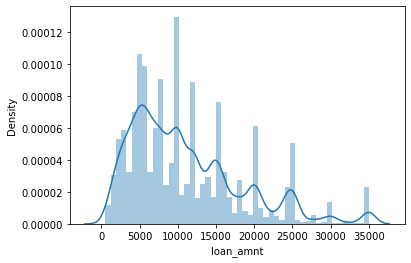

funded_amnt


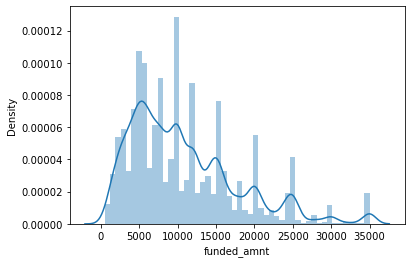

funded_amnt_inv


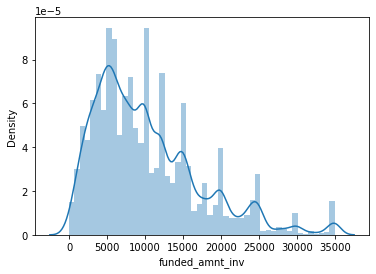

annual_inc_log


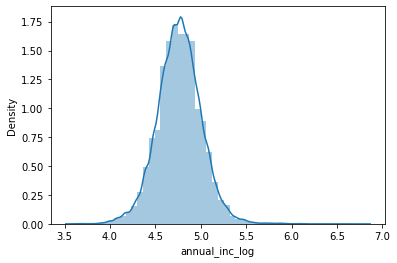

installment


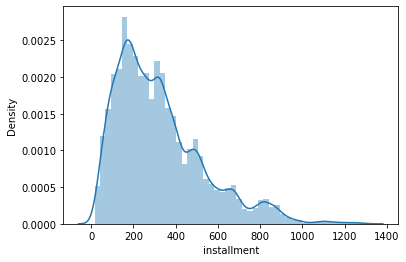

int_rate_num


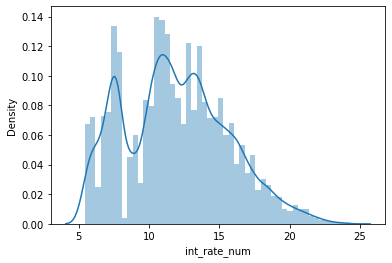

In [28]:
#Step 16:
#Univariate analysis: Plotting distribution for different continous variables
#numvarcnt = len(numvarlist)
for i in numvarlist:
    print(i)
    sns.distplot(loanfinaldf[i],bins=50)
    plt.show()

loan_amnt


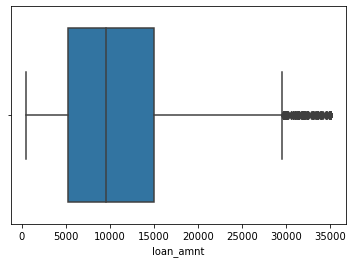

funded_amnt


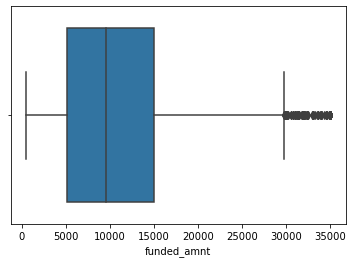

funded_amnt_inv


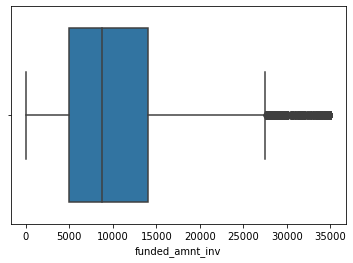

annual_inc_log


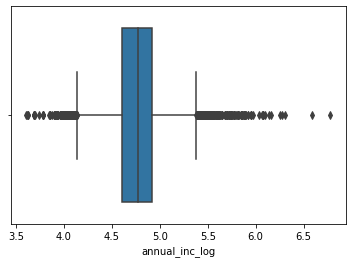

installment


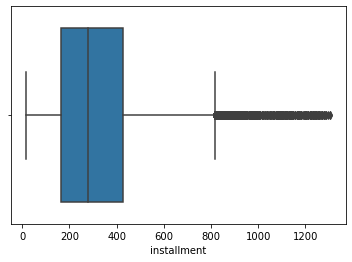

int_rate_num


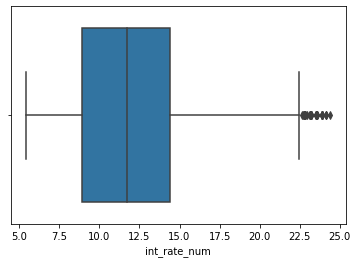

In [29]:
#Step 15:
#Univariate analysis: Plotting box for different continous variables
for i in numvarlist:
    print(i)
    sns.boxplot(loanfinaldf[i])
    plt.show()

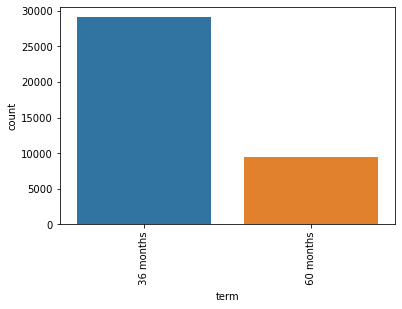

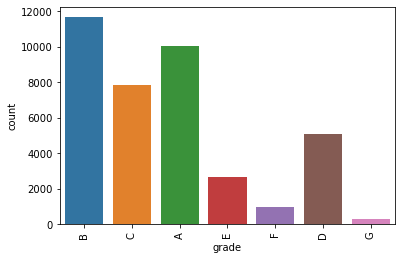

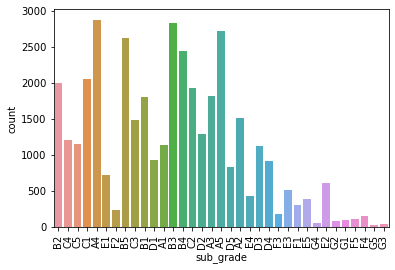

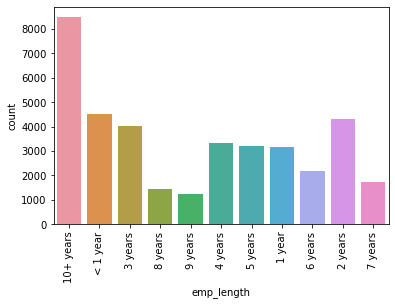

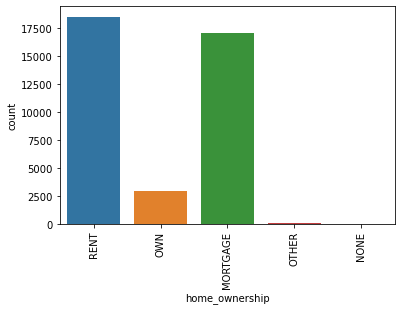

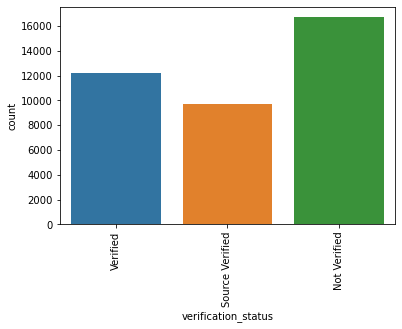

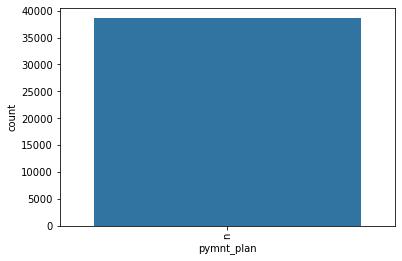

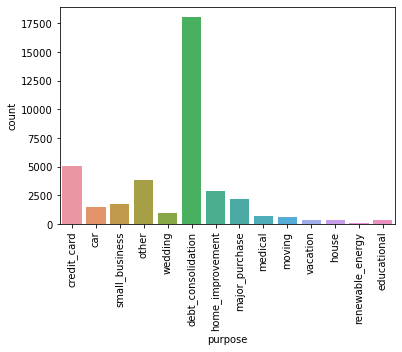

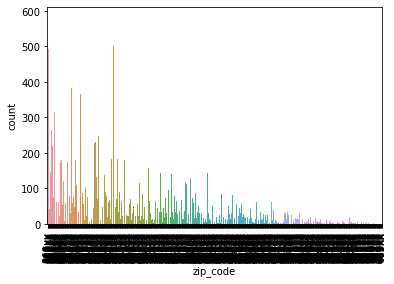

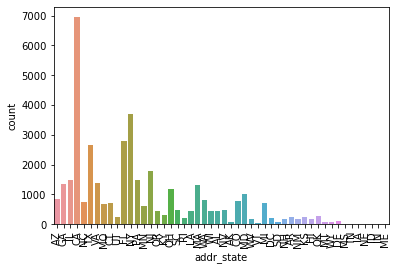

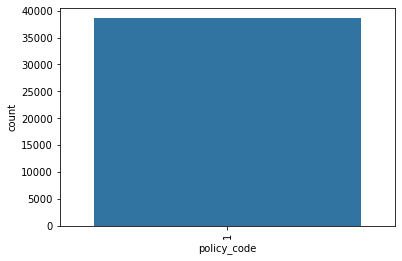

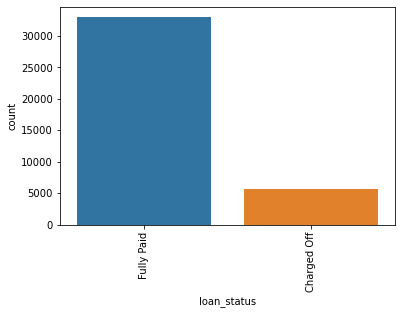

In [30]:
#Step 16:
#Univariate analysis: Plotting count for different categorical variables
#labellist = ['XXX']
for i in catvarlist:
    sns.countplot(loanfinaldf[i])
    plt.xticks(rotation=90)
    plt.show()

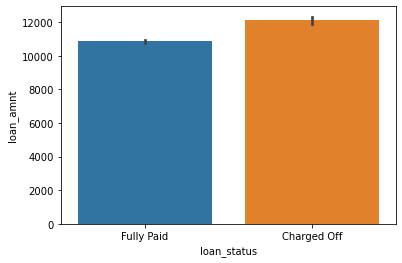

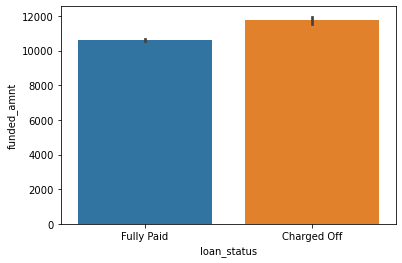

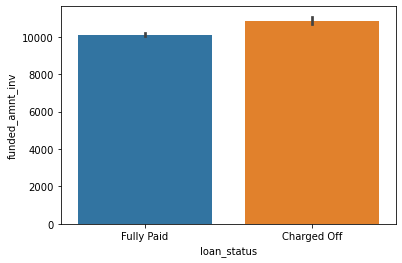

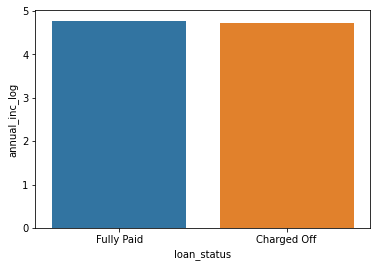

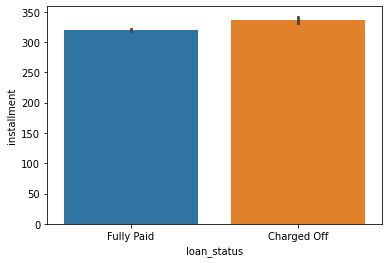

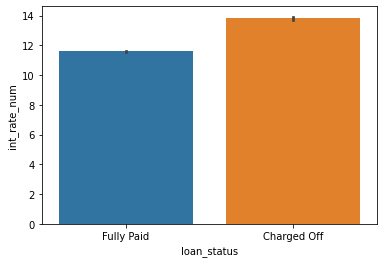

In [31]:
for i in numvarlist:
    sns.barplot( loanfinaldf['loan_status'], loanfinaldf[i])
    plt.show()

In [32]:
x = loanfinaldf[loanfinaldf["loan_status"]== 'Fully Paid']["loan_status"].value_counts().index.values
y = loanfinaldf[loanfinaldf["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values

print(y)

x1 = loanfinaldf[loanfinaldf["loan_status"]== 'Charged Off']["loan_status"].value_counts().index.values
y1 = loanfinaldf[loanfinaldf["loan_status"]== 'Charged Off']["loan_status"].value_counts().values

print(y1)
#sns.barplot(loanfinaldf["loan_status"], loanfinaldf["loan_status"])

#tr1 = go.Bar(
#            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
#            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
#            name='Bad credit'
#    )

[32950]
[5627]


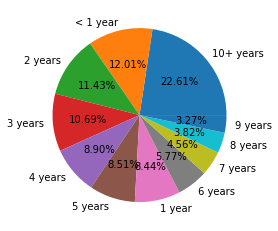

In [33]:
plt.pie(loanfinaldf['emp_length'].value_counts(), labels = loanfinaldf['emp_length'].value_counts().index, autopct= '%0.2f%%');

In [34]:
loanfinaldf.term.unique() # [home_ownership']

array([' 36 months', ' 60 months'], dtype=object)

<AxesSubplot:xlabel='loan_amnt', ylabel='funded_amnt'>

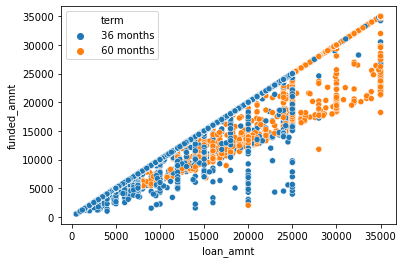

In [35]:
#["loan_amnt", "funded_amnt" , "funded_amnt_inv" , "annual_inc"]
sns.scatterplot(loanfinaldf['loan_amnt'], loanfinaldf['funded_amnt'],hue=loanfinaldf['term'])

<AxesSubplot:xlabel='annual_inc_log', ylabel='loan_amnt'>

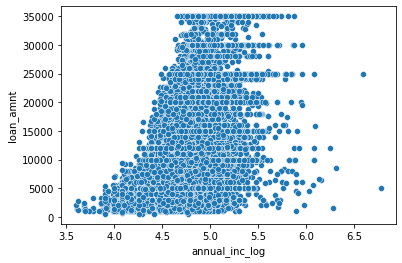

In [36]:
sns.scatterplot(loanfinaldf['annual_inc_log'], loanfinaldf['loan_amnt'])

<AxesSubplot:xlabel='loan_amnt', ylabel='funded_amnt_inv'>

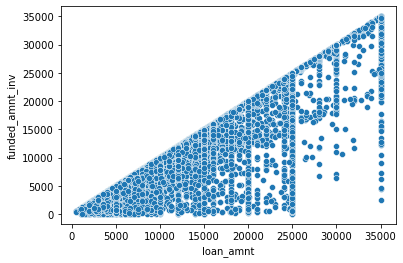

In [37]:
sns.scatterplot(loanfinaldf['loan_amnt'], loanfinaldf['funded_amnt_inv'])

<AxesSubplot:xlabel='funded_amnt', ylabel='funded_amnt_inv'>

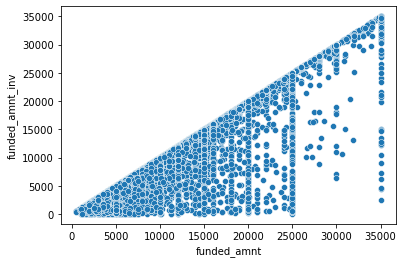

In [38]:
sns.scatterplot(loanfinaldf['funded_amnt'], loanfinaldf['funded_amnt_inv'])

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='installment'>

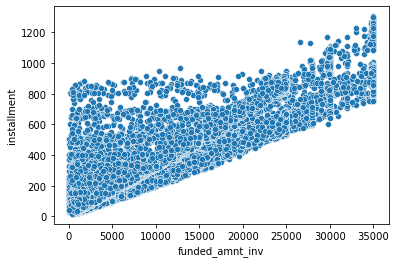

In [39]:
sns.scatterplot(loanfinaldf['funded_amnt_inv'], loanfinaldf['installment'])

<AxesSubplot:xlabel='int_rate_num', ylabel='loan_amnt'>

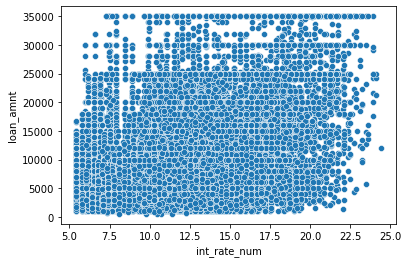

In [40]:
sns.scatterplot(loanfinaldf['int_rate_num'],loanfinaldf['loan_amnt'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

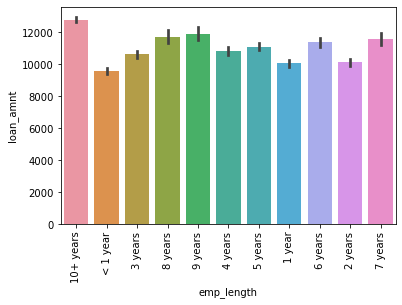

In [41]:
sns.barplot(loanfinaldf['emp_length'], loanfinaldf['loan_amnt'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

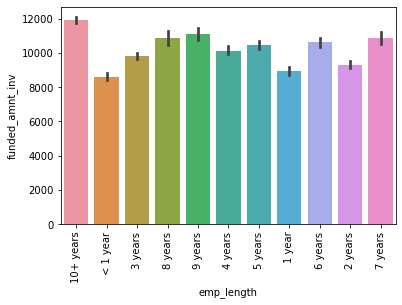

In [42]:
sns.barplot(loanfinaldf['emp_length'], loanfinaldf['funded_amnt_inv'])
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

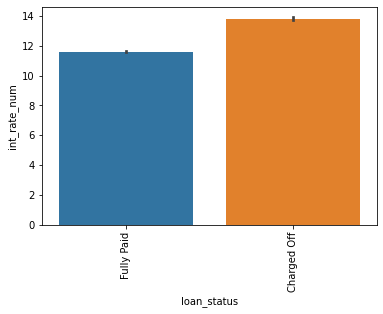

In [43]:
sns.barplot(loanfinaldf['loan_status'], loanfinaldf['int_rate_num'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

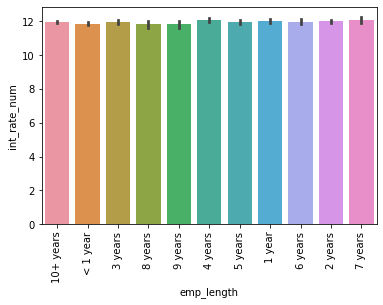

In [44]:
sns.barplot(loanfinaldf['emp_length'], loanfinaldf['int_rate_num'])
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

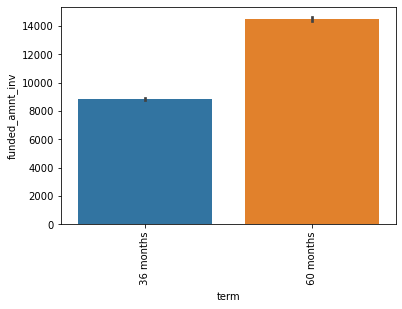

In [45]:
sns.barplot(loanfinaldf['term'], loanfinaldf['funded_amnt_inv'])
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

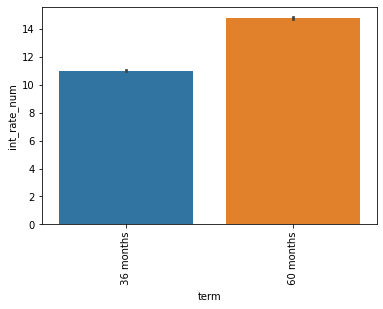

In [46]:
sns.barplot(loanfinaldf['term'], loanfinaldf['int_rate_num'])
plt.xticks(rotation = 90)

loan_status  Charged Off  Fully Paid
emp_length                          
1 year               456        2713
10+ years           1331        7157
2 years              567        3724
3 years              555        3457
4 years              462        2880
5 years              458        2736
6 years              307        1861
7 years              263        1448
8 years              203        1232
9 years              158        1068
< 1 year             639        3869


<AxesSubplot:xlabel='emp_length'>

<Figure size 864x576 with 0 Axes>

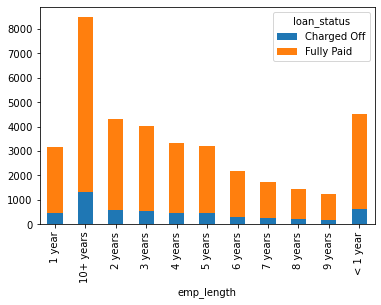

In [47]:
ct = pd.crosstab( loanfinaldf['emp_length'], loanfinaldf['loan_status'])
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status  Charged Off  Fully Paid
emp_length                          
1 year          0.143894    0.856106
10+ years       0.156810    0.843190
2 years         0.132137    0.867863
3 years         0.138335    0.861665
4 years         0.138241    0.861759
5 years         0.143394    0.856606
6 years         0.141605    0.858395
7 years         0.153711    0.846289
8 years         0.141463    0.858537
9 years         0.128874    0.871126
< 1 year        0.141748    0.858252


<AxesSubplot:xlabel='emp_length'>

<Figure size 864x576 with 0 Axes>

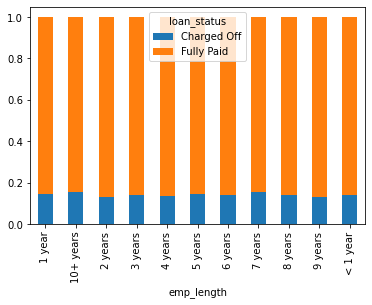

In [48]:
ct = pd.crosstab( loanfinaldf['emp_length'], loanfinaldf['loan_status'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           0.136713    0.863287
NONE               0.000000    1.000000
OTHER              0.183673    0.816327
OWN                0.148908    0.851092
RENT               0.153626    0.846374


<AxesSubplot:xlabel='home_ownership'>

<Figure size 864x576 with 0 Axes>

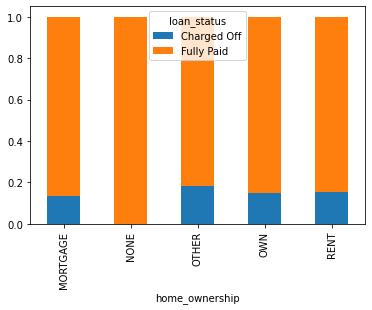

In [49]:
ct = pd.crosstab( loanfinaldf['home_ownership'], loanfinaldf['loan_status'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status  Charged Off  Fully Paid
grade                               
A               0.059930    0.940070
B               0.122056    0.877944
C               0.171943    0.828057
D               0.219862    0.780138
E               0.268494    0.731506
F               0.326844    0.673156
G               0.337793    0.662207


<AxesSubplot:xlabel='grade'>

<Figure size 864x576 with 0 Axes>

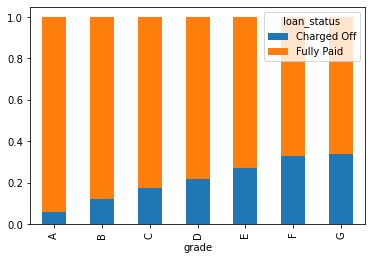

In [50]:
ct = pd.crosstab( loanfinaldf['grade'], loanfinaldf['loan_status'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status  Charged Off  Fully Paid
term                                
 36 months      0.110909    0.889091
 60 months      0.253138    0.746862


<AxesSubplot:xlabel='term'>

<Figure size 864x576 with 0 Axes>

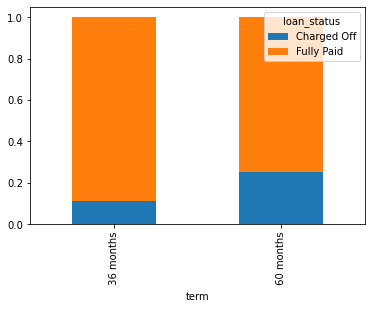

In [51]:
ct = pd.crosstab( loanfinaldf['term'], loanfinaldf['loan_status'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status  Charged Off  Fully Paid
term                                
 36 months          3227       25869
 60 months          2400        7081


<AxesSubplot:xlabel='term'>

<Figure size 864x576 with 0 Axes>

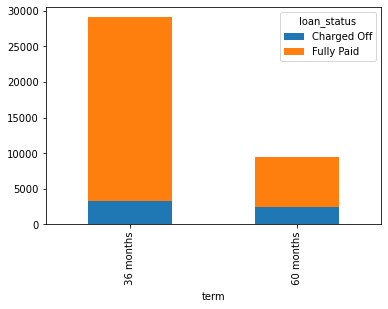

In [52]:
ct = pd.crosstab( loanfinaldf['term'], loanfinaldf['loan_status'])
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

term         36 months   60 months
emp_length                        
1 year        0.815399    0.184601
10+ years     0.687912    0.312088
2 years       0.795386    0.204614
3 years       0.770688    0.229312
4 years       0.766008    0.233992
5 years       0.736068    0.263932
6 years       0.721863    0.278137
7 years       0.731151    0.268849
8 years       0.731010    0.268990
9 years       0.737357    0.262643
< 1 year      0.816105    0.183895


<AxesSubplot:xlabel='emp_length'>

<Figure size 864x576 with 0 Axes>

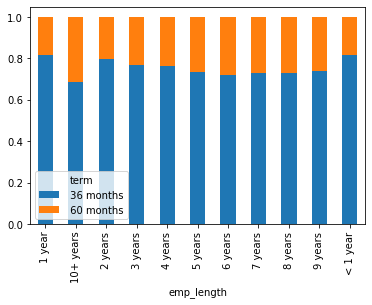

In [53]:
ct = pd.crosstab( loanfinaldf['emp_length'], loanfinaldf['term'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status         Charged Off  Fully Paid
purpose                                    
car                    0.106738    0.893262
credit_card            0.107818    0.892182
debt_consolidation     0.153254    0.846746
educational            0.172308    0.827692
home_improvement       0.120696    0.879304
house                  0.160763    0.839237
major_purchase         0.103256    0.896744
medical                0.155653    0.844347
moving                 0.159722    0.840278
other                  0.163777    0.836223
renewable_energy       0.186275    0.813725
small_business         0.270810    0.729190
vacation               0.141333    0.858667
wedding                0.103672    0.896328


<AxesSubplot:xlabel='purpose'>

<Figure size 864x576 with 0 Axes>

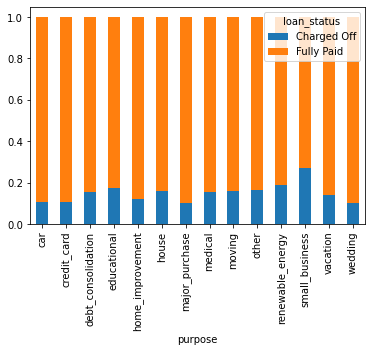

In [54]:
ct = pd.crosstab( loanfinaldf['purpose'], loanfinaldf['loan_status'], normalize='index')
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

loan_status         Charged Off  Fully Paid
purpose                                    
car                         160        1339
credit_card                 542        4485
debt_consolidation         2767       15288
educational                  56         269
home_improvement            347        2528
house                        59         308
major_purchase              222        1928
medical                     106         575
moving                       92         484
other                       633        3232
renewable_energy             19          83
small_business              475        1279
vacation                     53         322
wedding                      96         830


<AxesSubplot:xlabel='purpose'>

<Figure size 864x576 with 0 Axes>

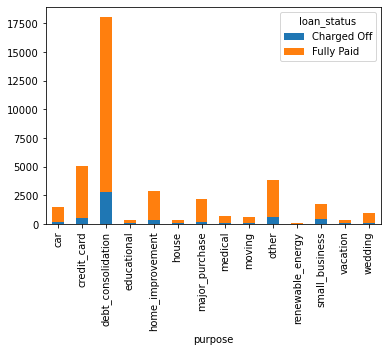

In [55]:
ct = pd.crosstab( loanfinaldf['purpose'], loanfinaldf['loan_status'])
print(ct)
plt.figure(figsize = (12,8))
ct.plot.bar(stacked = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

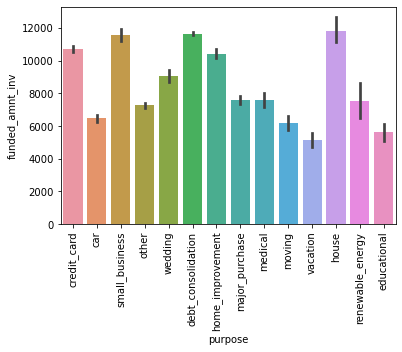

In [56]:
sns.barplot(loanfinaldf['purpose'], loanfinaldf['funded_amnt_inv'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='loan_status'>

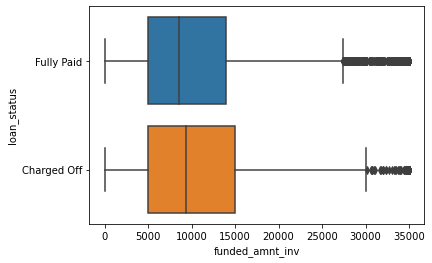

In [57]:
sns.boxplot(loanfinaldf['funded_amnt_inv'], loanfinaldf['loan_status'])

<AxesSubplot:>

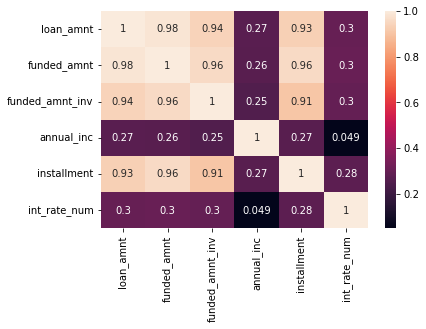

In [58]:
sns.heatmap(loanfinaldf[["loan_amnt", "funded_amnt" , "funded_amnt_inv" , "annual_inc", "installment","int_rate_num"]].corr(), annot=True) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

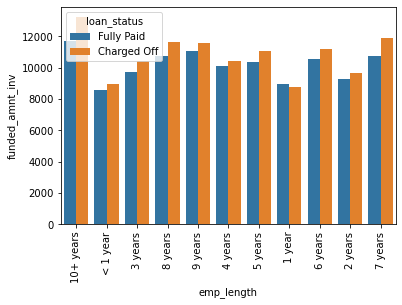

In [59]:
sns.barplot(x=loanfinaldf["emp_length"],y=loanfinaldf["funded_amnt_inv"], hue=loanfinaldf["loan_status"], ci=None)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE')])

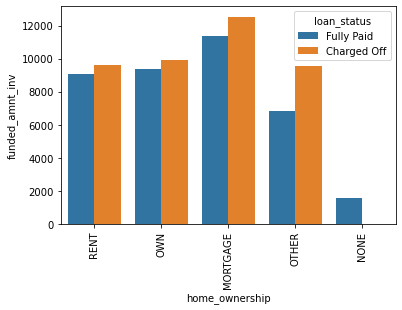

In [60]:
sns.barplot(x=loanfinaldf["home_ownership"],y=loanfinaldf["funded_amnt_inv"], hue=loanfinaldf["loan_status"], ci=None)
plt.xticks(rotation = 90)

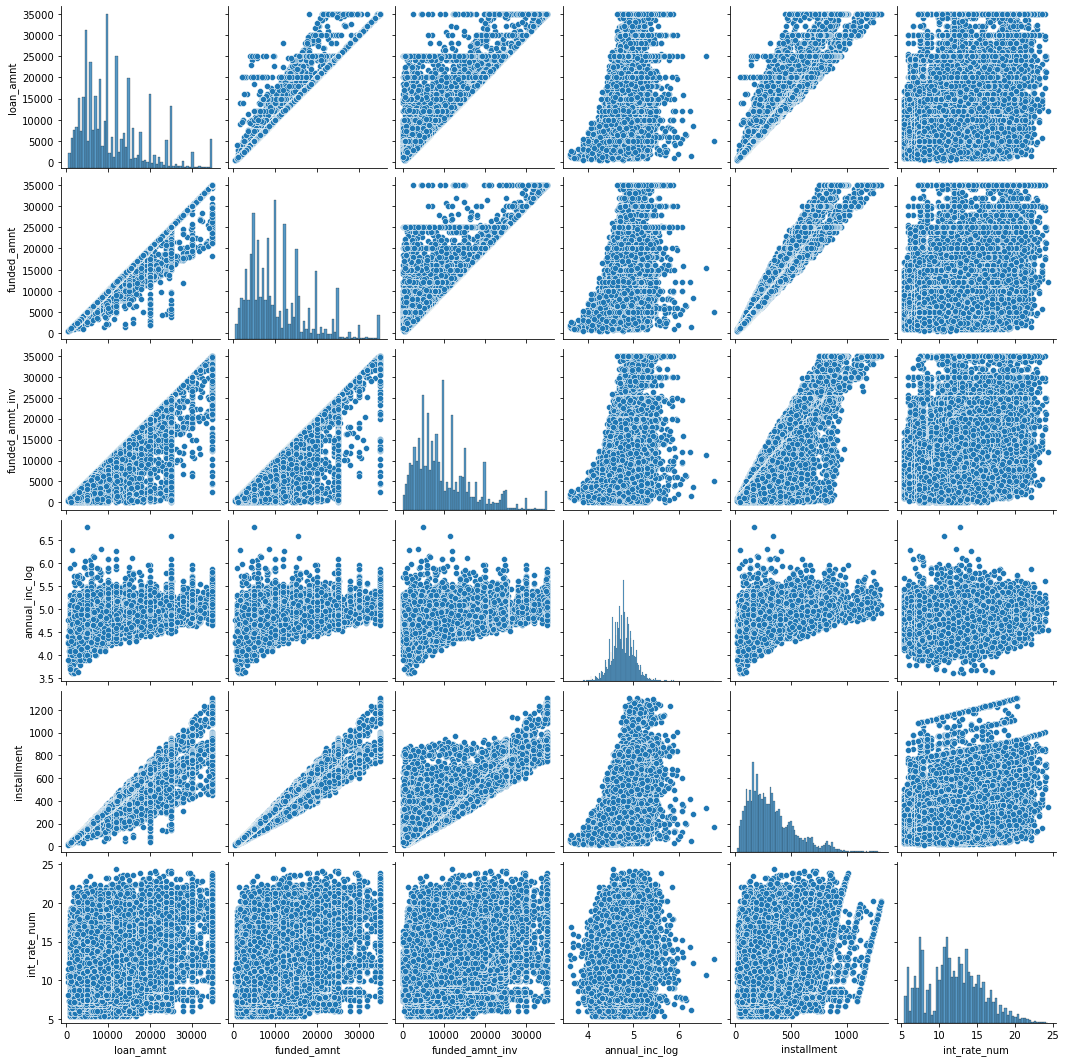

In [62]:
df1_sub = loanfinaldf[["loan_amnt", "funded_amnt" , "funded_amnt_inv" , "annual_inc_log", "installment","int_rate_num"]]

sns.pairplot(df1_sub)